In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

Stored patterns : 


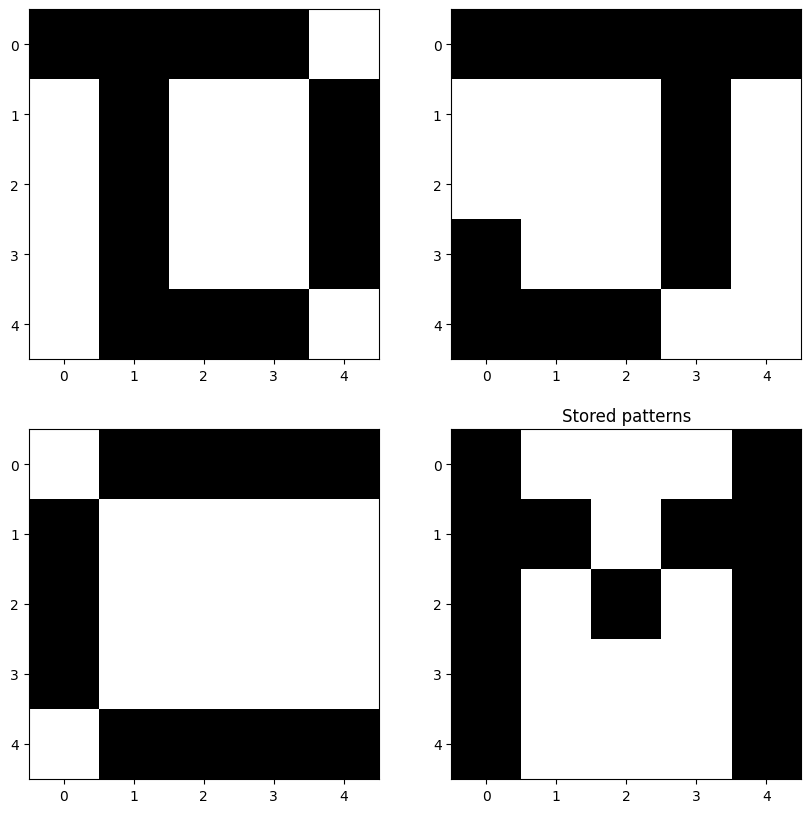

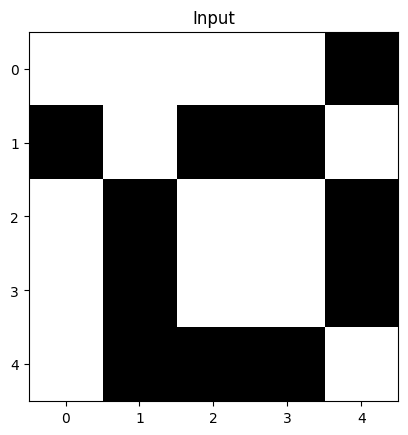

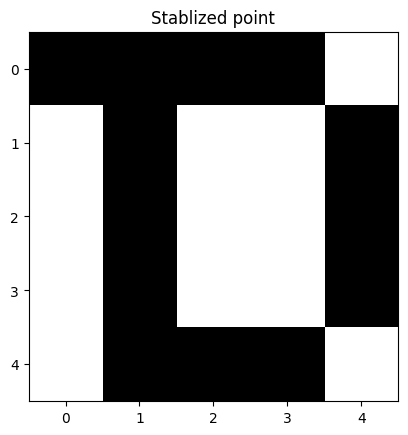

In [ ]:
X = np.array([[1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1],
              [1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1],
              [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1],
              [1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1]])

# Learn the weights according to Hebb's rule
W = np.dot(X.T, X)
np.fill_diagonal(W, 0)
W = W.astype(float) / X.shape[0]

# Dynamical (Linear) System and fixed points
x = X[0].copy()
x[0:10] *= -1

print('Stored patterns : ')

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(-X[0].reshape(5, 5), cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(-X[1].reshape(5, 5), cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(-X[2].reshape(5, 5), cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(-X[3].reshape(5, 5), cmap='gray')
plt.title('Stored patterns')
plt.show()

plt.imshow(-x.reshape(5, 5), cmap='gray')
plt.title('Input')
plt.show()

y = x.copy()
err_y = 10
iterations = 0
while err_y > 1:
    yp = np.sign(np.dot(W, y))
    err_y = np.linalg.norm(yp - y)
    y = yp.copy()
    iterations += 1

plt.imshow(-y.reshape(5, 5), cmap='gray')
plt.title('Stablized point')
plt.show()

In [1]:
import numpy as np
import itertools

def update_state(state, W):
    """Update the state based on the weight matrix."""
    return np.sign(np.dot(W, state))

def create_noisy_pattern(pattern, flip_indices):
    """Create a noisy pattern by flipping certain indices."""
    noisy_pattern = pattern.copy()
    for idx in flip_indices:
        noisy_pattern[idx] = 1 - noisy_pattern[idx]
    return noisy_pattern

def find_stable_state(noisy_pattern, W):
    """Find the stable state starting from a noisy pattern."""
    state = noisy_pattern
    for _ in range(100):
        new_state = update_state(state, W)
        if np.array_equal(new_state, state):
            break
        state = new_state
    return state

def test_noisy_pattern(pattern, W):
    """Test a pattern with noise and return the maximum tolerable error."""
    n = len(pattern)
    max_flips = 0

    for num_flips in range(n + 1):
        for flip_indices in itertools.combinations(range(n), num_flips):
            noisy_pattern = create_noisy_pattern(pattern, flip_indices)
            state = find_stable_state(noisy_pattern, W)

            if np.array_equal(state, pattern):
                max_flips = num_flips
            else:
                break

    return max_flips

def main():
    """Main function to test all patterns."""
    for pattern in X:
        max_flips = test_noisy_pattern(pattern, W)
        print(f"For pattern {pattern}, the maximum tolerable error is {max_flips} bit(s).")

if __name__ == "__main__":
    main()


NameError: name 'X' is not defined

In [ ]:
def calculateEnergy_MultiFlipFlop(x):
  e = 0
  n = x.shape[0]
  for i in range(n):
    for j in range(n):
      if i == j: continue
      e += (x[i] * x[j] * (-2))

  e = - 1 * e / 2

  for i in range(n):
    e -= x[i]

  return e + 1


def getStableState_MultiFlipFlop(x):
  n = x.shape[0]
  e = calculateEnergy_MultiFlipFlop(x)

  no_iterations = 1000
  iterations = 0

  while iterations < no_iterations:
    random_neuron = np.random.randint(0, n)
    xs = x.copy()
    xs[random_neuron] = (xs[random_neuron] + 1) % 2
    es = calculateEnergy_MultiFlipFlop(xs)

    if es < e:
      e = es
      x = xs.copy()

    iterations += 1

  return x

x = np.array([1, 1, 1, 1])
getStableState_MultiFlipFlop(x)

array([0, 0, 0, 1])

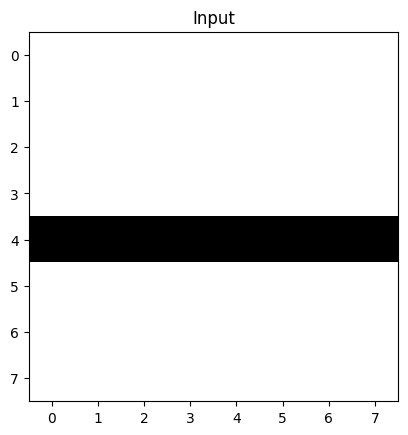

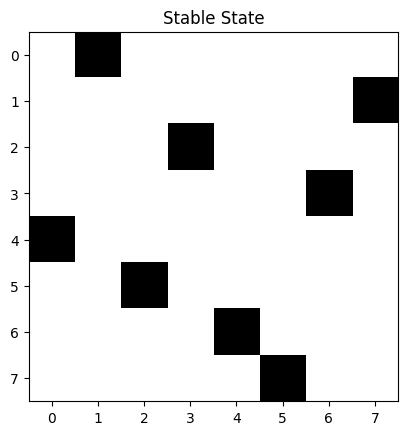

In [ ]:
def calculateEnergy_8Rook(x):
  e = 0

  n = int(np.sqrt(x.shape[0]))
  x_mat = x.reshape(n, n)

  for i in range(n):
    e += calculateEnergy_MultiFlipFlop(x_mat[i, :])
    e += calculateEnergy_MultiFlipFlop(x_mat[:, i])

  return e

x = np.zeros(64).astype(int)
x[32:40] = 1

plt.imshow(-x.reshape(8, 8), cmap='gray')
plt.title('Input')
plt.show()

def getStableState_8Rook(x):
  n = x.shape[0]
  e = calculateEnergy_8Rook(x)

  no_iterations = 1000
  iterations = 0

  while iterations < no_iterations:
    xs = x.copy()

    random_rook = np.random.choice(np.where(x == 1)[0])
    random_pos = np.random.randint(0, n)
    while x[random_pos] == 1:
      random_pos = np.random.randint(0, n)
    xs[random_rook] = 0
    xs[random_pos] = 1

    es = calculateEnergy_8Rook(xs)

    if es < e:
      e = es
      x = xs.copy()

    iterations += 1
  return x

plt.imshow(-getStableState_8Rook(x).reshape(8, 8), cmap='gray')
plt.title('Stable State')
plt.show()

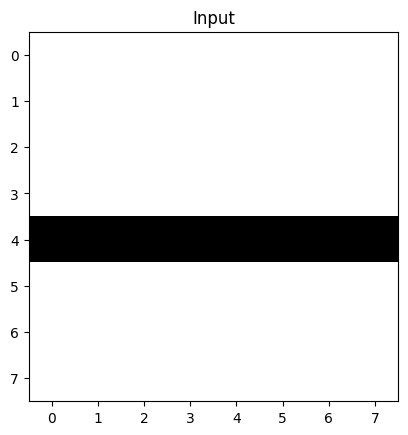

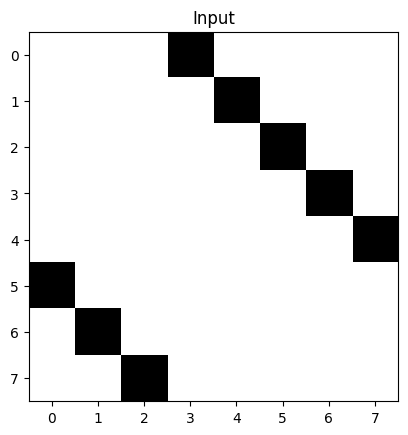

In [ ]:
def calEnergy_8Rook(x, W, thresholds):
    return -0.5 * np.dot(x.T, np.dot(W, x)) + np.dot(thresholds, x)

def updateState(x, W, theta):
    for i in range(len(x)):
        u = np.dot(W[i], x) - theta[i]
        x[i] = 1 if u >= 0 else 0
    return x


def getStableState_8Rook_Wt(x, W, thresholds):
  no_iterations = 1000

  for _ in range(no_iterations):
    xs = updateState(x.copy(), W, thresholds)
    if calEnergy_8Rook(xs, W, thresholds) > calEnergy_8Rook(x, W, thresholds):
        break
    x = xs

  return x


W = np.zeros((64, 64))

for i in range(8):
  for j in range(8):
    for k in range(8):
      W[i*8 + j, i*8 + k] = -2
      W[i*8 + j, k*8 + j] = -2

np.fill_diagonal(W, 0)

thresholds = -np.ones(64)

x = np.zeros(64).astype(int)
x[32:40] = 1

plt.imshow(-x.reshape(8, 8), cmap='gray')
plt.title('Input')
plt.show()

stable = getStableState_8Rook_Wt(x, W, thresholds)
plt.imshow(-stable.reshape(8, 8), cmap='gray')
plt.title('Stable')
plt.show()

In [ ]:
num_cities = 10

dist = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        dist[i, j] = (j - i) % num_cities

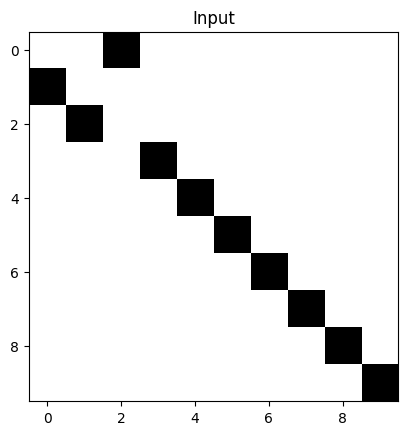

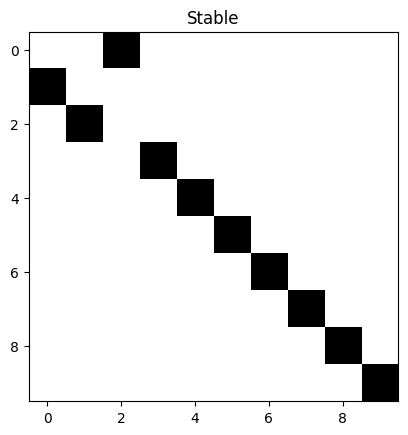

In [ ]:
def calEnergy_TSP(x, W, thresholds):
    return -0.5 * np.dot(x.T, np.dot(W, x)) + np.dot(thresholds, x)

def updateState(x, W, theta):
    for i in range(len(x)):
        u = np.dot(W[i], x) - theta[i]
        x[i] = 1 if u >= 0 else 0
    return x


def getStableState_TSP_Wt(x, W, thresholds):
  no_iterations = 1000

  for _ in range(no_iterations):
    xs = updateState(x.copy(), W, thresholds)
    if calEnergy_8Rook(xs, W, thresholds) > calEnergy_8Rook(x, W, thresholds):
        break
    x = xs

  return x


gamma = 0.5
W = np.zeros((100, 100))

for i in range(10):
  for j in range(10):
    for k in range(10):
      W[i*10 + j, i*10 + k] = -gamma
      W[i*10 + j, k*10 + j] = -gamma

for i in range(10):
  for j in range(10):
    W[i, j] -= dist[i, j]

np.fill_diagonal(W, 0)

thresholds = -gamma / 2 * np.ones(100)

x = np.zeros(100).astype(int)
# x[10: 20] = 1
# x = np.eye(10)
# x[0, 0] = 0
# x[1, 1] = 0
# x[2, 2] = 0
# x[0, 2] = 1
# x[1, 0] = 1
# x[2, 1] = 1
# x=  x.flatten()

plt.imshow(-x.reshape(10, 10), cmap='gray')
plt.title('Input')
plt.show()

stable = getStableState_TSP_Wt(x, W, thresholds)
plt.imshow(-stable.reshape(10, 10), cmap='gray')
plt.title('Stable')
plt.show()

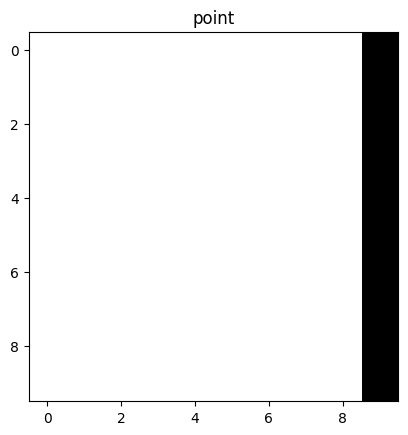

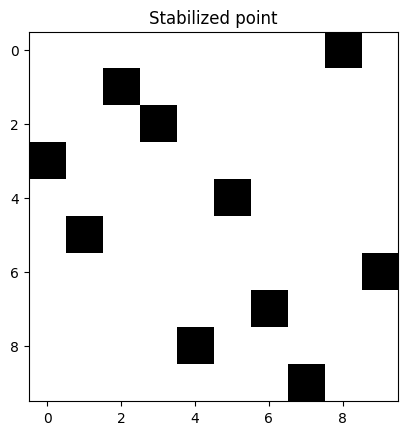

In [ ]:
def calculateEnergy_TSP(x, dist, gamma=8):
  n = int(np.sqrt(x.shape[0]))
  xs = x.reshape(n, n)

  e = 0

  for i in range(n):
    for j in range(n):
      if i == j: continue
      for k in range(n):
        e += (dist[i, j] * xs[i, k] * xs[j, (k + 1) % n])

  e /= 2

  e += ((gamma / 2) * calculateEnergy_8Rook(x))
  return e


n = 10
# x = np.eye(n)
# x[2, 2] = 0
# x[3, 3] = 0
# x[2, 3] = 1
# x[3, 2] = 1
x = np.zeros((n, n))
x[:, 0] = 1

x = x.reshape(1, -1)[0]

plt.imshow(-x.reshape(n, n), cmap='gray')
plt.title('point')
plt.show()

e = calculateEnergy_TSP(x, dist)

no_iterations = 2000
iterations = 0

while iterations < no_iterations:
  random_neuron = np.random.randint(0, n * n)
  xs = x.copy()
  xs[random_neuron] = (xs[random_neuron] + 1) % 2
  es = calculateEnergy_TSP(xs, dist)

  if es < e:
    e = es
    x = xs.copy()

  iterations += 1

plt.imshow(-x.reshape(n, n), cmap='gray')
plt.title('Stabilized point')
plt.show()